In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,973 cases (7 day average) as of Sat 24 Apr, -19.4 since Fri 23 Apr
108 hospitalised (7 day average) as of Mon 26 Apr, -4.3 since Sun 25 Apr
14 died (7 day average) as of Sat 24 Apr, -1.1 since Fri 23 Apr


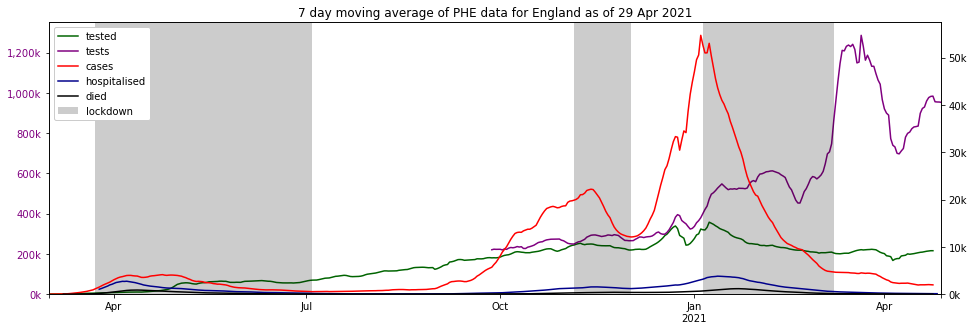

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

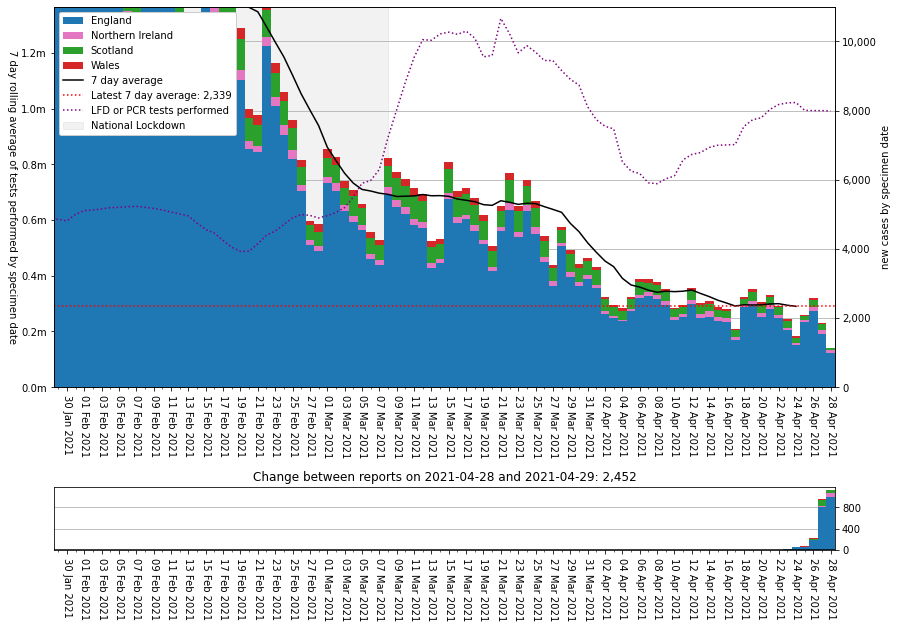

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

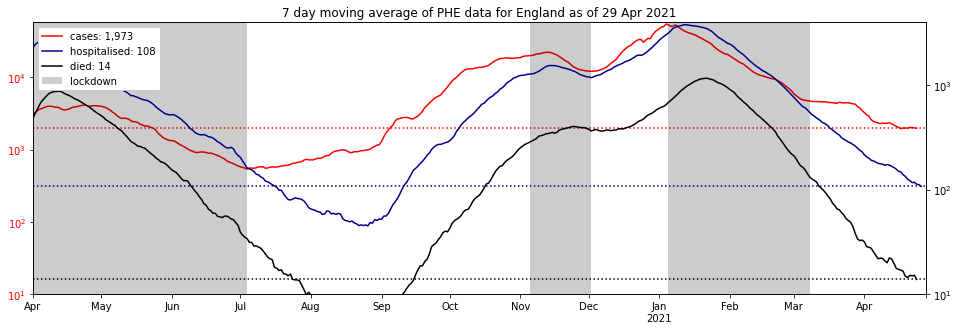

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

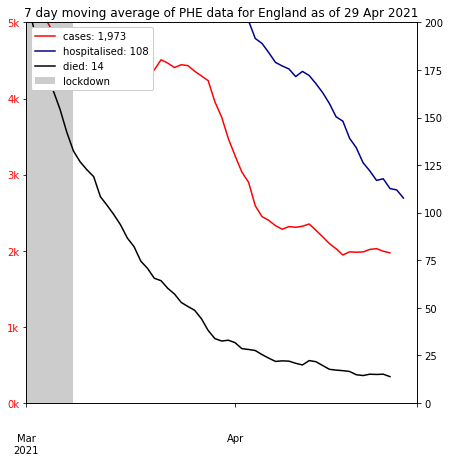

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,28 Apr 21,"+11,749,387","+28,545,198","+11,749,387","+394,152","+103,352","+394,152"
Northern Ireland,28 Apr 21,"+377,302","+935,589","+377,302","+9,833","+7,933","+9,833"
Scotland,28 Apr 21,"+1,184,629","+2,796,810","+1,184,629","+41,682","+6,832","+41,682"
Wales,28 Apr 21,"+732,643","+1,816,451","+732,643","+17,218","+16,023","+17,218"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,11749387.0,28545198.0,16795811.0,56286961,20.874083,29.839612,49.286305
1,Northern Ireland,N92000002,377302.0,935589.0,558287.0,1893667,19.924411,29.481794,50.593795
2,Scotland,S92000003,1184629.0,2796810.0,1612181.0,5463300,21.683396,29.509289,48.807314
3,Wales,W92000004,732643.0,1816451.0,1083808.0,3152879,23.237270,34.375185,42.387545


'partial: 34,094,048 (51.0%), full: 14,043,961'

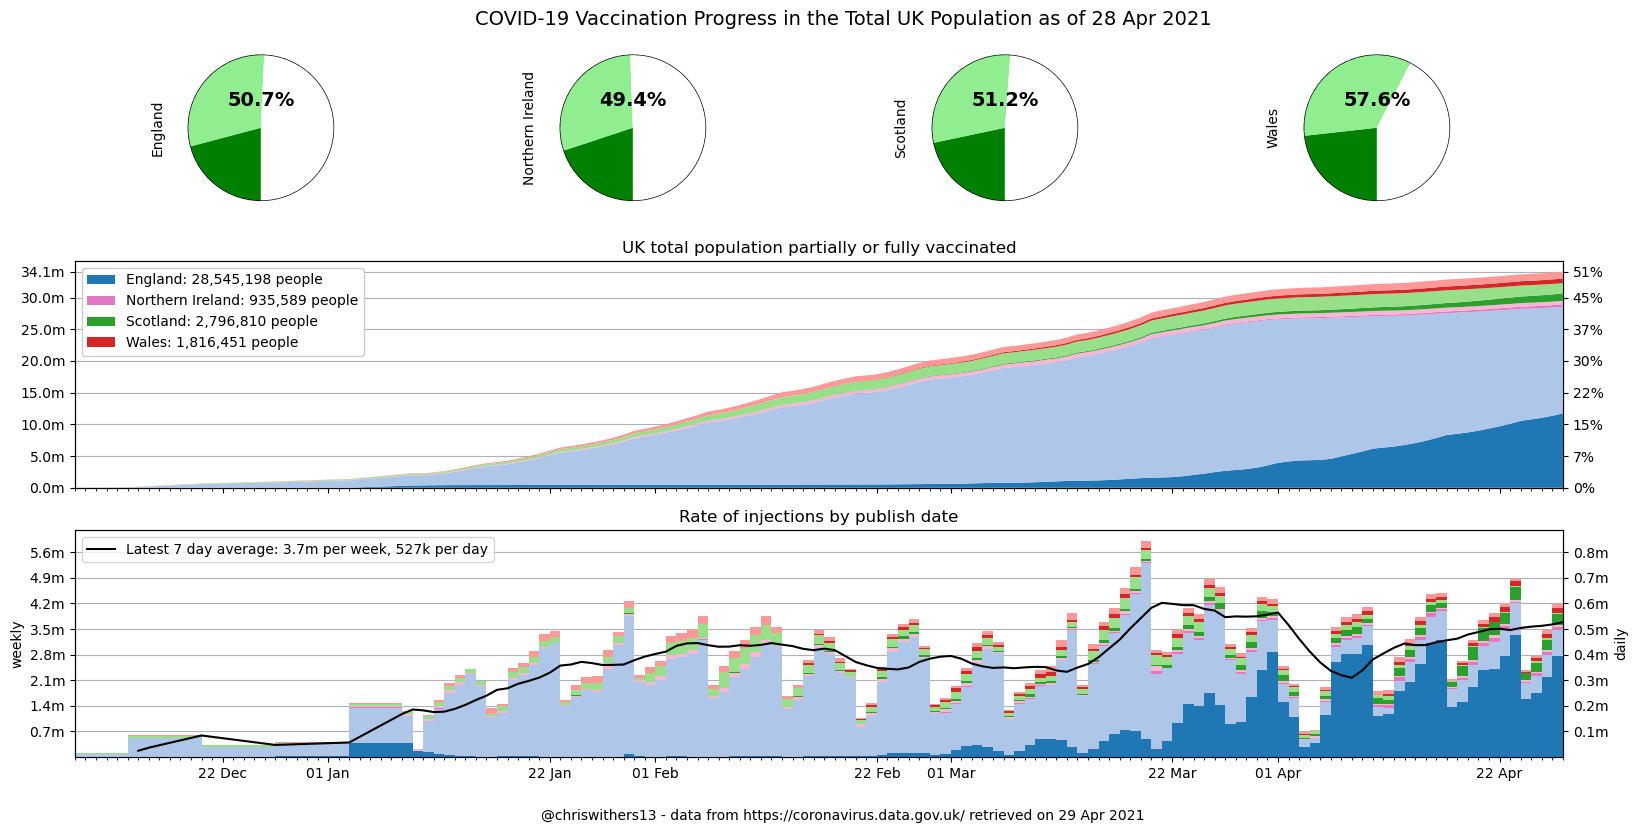

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

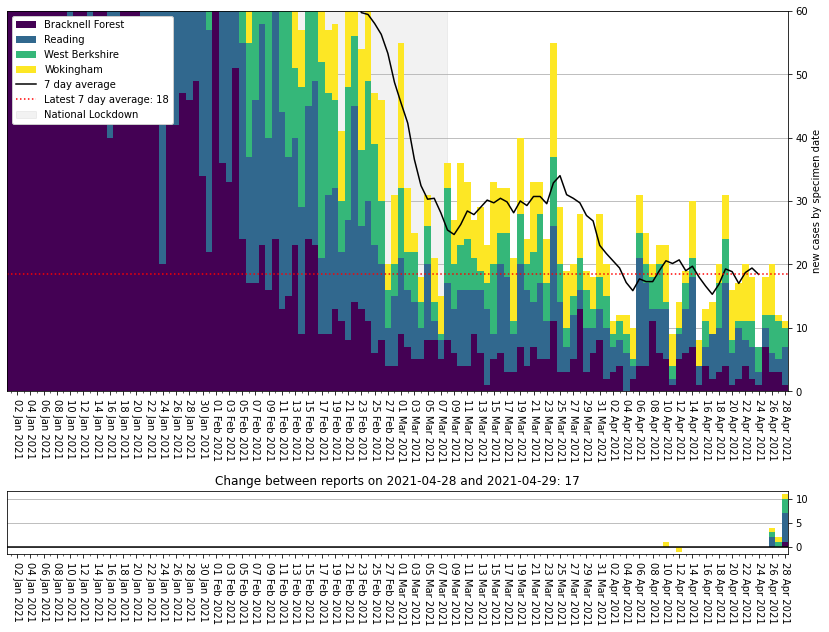

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

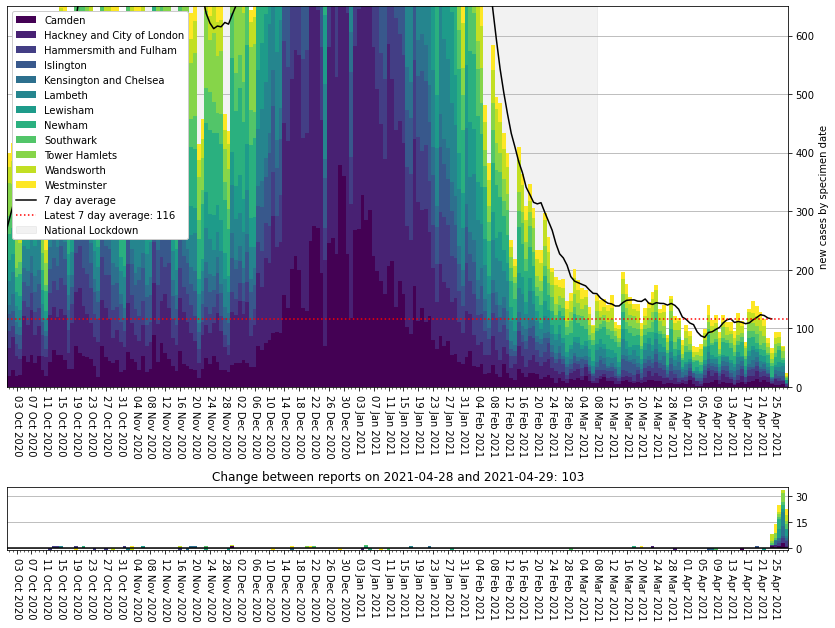

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000120,Hyndburn,104.882593,85.0,2021-04-28
E07000169,Selby,93.798279,85.0,2021-04-28
E06000013,North Lincolnshire,73.131660,126.0,2021-04-28
N09000005,Derry City and Strabane,68.744877,104.0,2021-04-28
N09000009,Mid Ulster,67.327373,100.0,2021-04-28
E08000017,Doncaster,58.033281,181.0,2021-04-28
E08000034,Kirklees,56.390935,248.0,2021-04-28
E08000036,Wakefield,53.400400,186.0,2021-04-28
N09000006,Fermanagh and Omagh,51.108631,60.0,2021-04-28


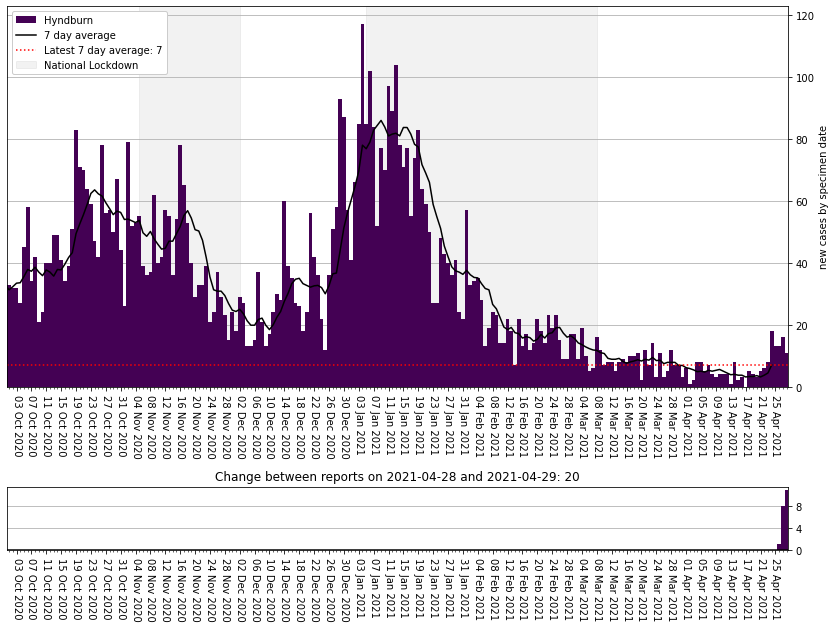

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,37.824391,300.0,2021-04-28
E08000034,Kirklees,56.390935,248.0,2021-04-28
E08000032,Bradford,42.980792,232.0,2021-04-28
E08000025,Birmingham,17.340797,198.0,2021-04-28
E08000019,Sheffield,33.683678,197.0,2021-04-28
S12000049,Glasgow City,30.168057,191.0,2021-04-28
E08000036,Wakefield,53.400400,186.0,2021-04-28
E08000017,Doncaster,58.033281,181.0,2021-04-28
E08000003,Manchester,28.217011,156.0,2021-04-28


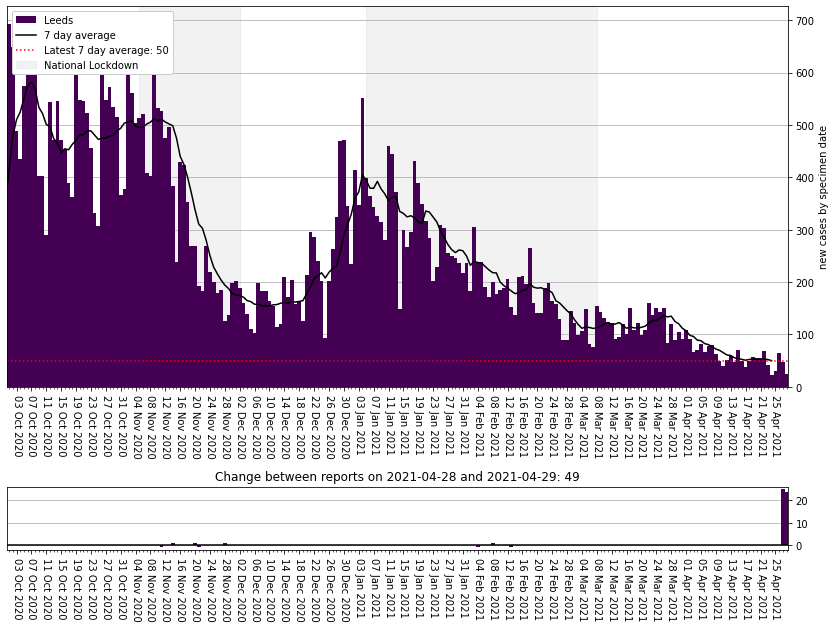

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.7
phe_max = 0.13

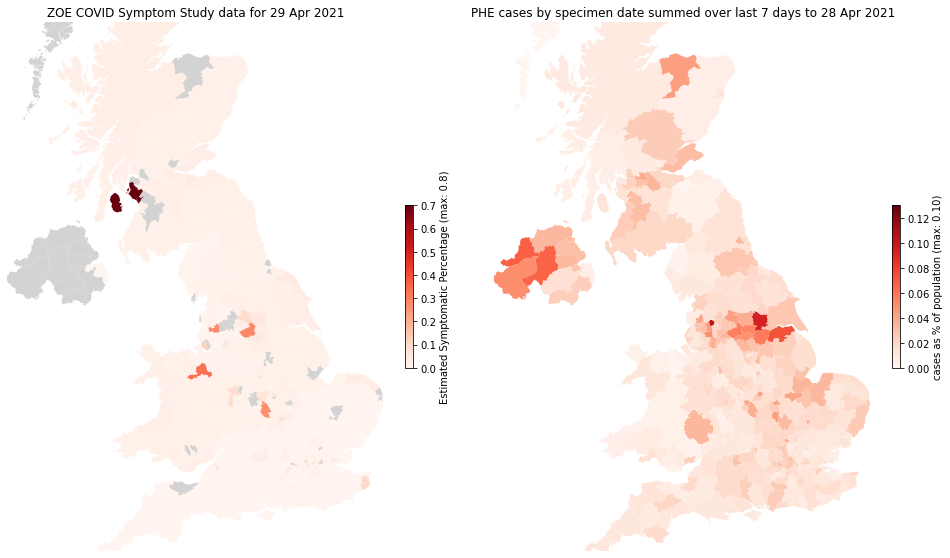

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...